# Required modules are imported here

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset,Reader,SVD
from surprise.model_selection import train_test_split as tts
from surprise import accuracy

# Importing the Datasets

In [6]:
d1=pd.read_csv("Dataset.csv")
d1

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [7]:
d2=pd.read_csv("Movie_Id_Titles.csv")
d2

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


# Dataset details

In [8]:
d1.count()
# this method tells us about the empty columns

user_id      100003
item_id      100003
rating       100003
timestamp    100003
dtype: int64

In [12]:
d2.count()

item_id    1682
title      1682
dtype: int64

In [10]:
d1.describe()
# this method tells us about the statistical information of the data

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [13]:
d2.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [14]:
d1.info()
#this method tells us about no of non empty rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [15]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [16]:
d1.isna().any()
# this method tells us about the null values

user_id      False
item_id      False
rating       False
timestamp    False
dtype: bool

In [17]:
d2.isna().any()

item_id    False
title      False
dtype: bool

Creating a 'Reader' object for specifying the reader scale

In [18]:
r=Reader(rating_scale=(1, 5))

Loading the imported dataset into surprise dataset

In [23]:
df = Dataset.load_from_df(d1[['user_id','item_id','rating']], r)

# visualising the data

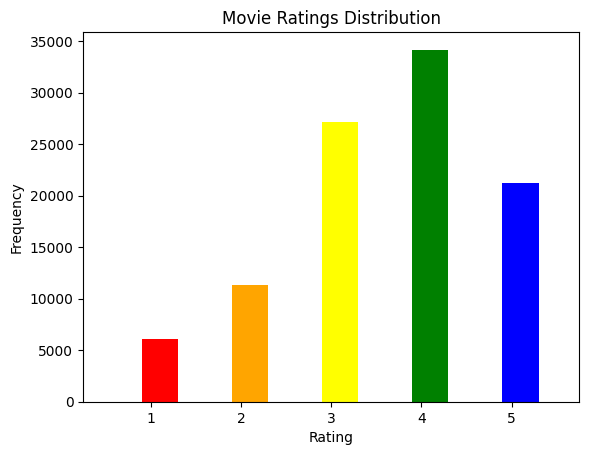

In [43]:
# Plotting a histogram of movie ratings
colors = ['red', 'orange', 'yellow', 'green', 'blue']
rate = d1['rating']
for i, color in enumerate(colors):
    plt.hist(rate[rate == i + 1],bins=5,color=color,label=f'Rating {i + 1}',alpha=1.0,width=0.4)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Movie Ratings Distribution')
plt.show()

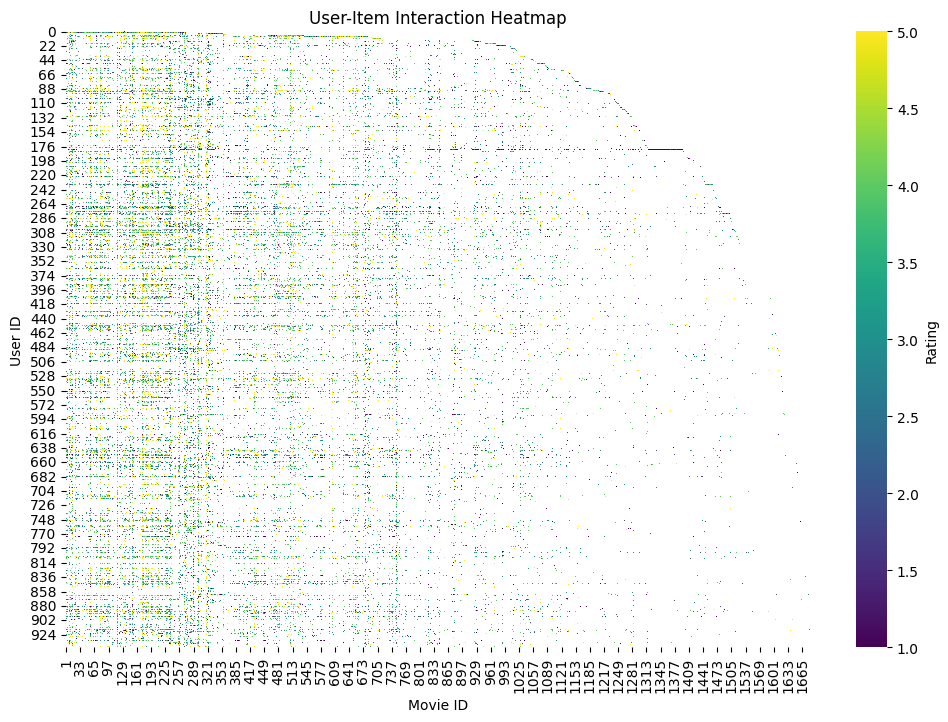

In [45]:
from os import uname
# Create a heatmap of user-item interactions
um= d1.pivot_table(index='user_id',columns='item_id',values='rating')
plt.figure(figsize=(12, 8))
sns.heatmap(um,cmap='viridis',cbar_kws={'label':'Rating'})
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.title('User-Item Interaction Heatmap')
plt.show()

## Usage of ML Algorithm

In [21]:
train,test=tts(df,test_size=0.2,random_state=52)

Using the singular value decompostion (SVD) as the algorthim

In [46]:
algo=SVD()

Training the model

In [48]:
algo.fit(train)

Making predictions on the test data

In [49]:
pred= algo.test(test)

Caluculating the accuracy of the model by using the RMSE (Root Mean Squared Error)

In [57]:
print("The accuracy of the model is:")
accuracy.rmse(pred)*100

The accuracy of the model is:
RMSE: 0.9386


93.86126786079971

# Result:
Here the accuracy of SVD algorithm is 93.86 %.

#Predicting the top 10 recommendations using SVD model by taking user id as 1.

In [70]:
user_id = 1
top_n = 10

# A list of all movie IDs
ami = d1['item_id'].unique()

# Creating a list of tuples with the user ID and each item ID
uip = [(user_id,item_id,0) for item_id in ami]

# Predicting ratings for the user and all movies
uratings = algo.test(uip)

# Sorting the predicted ratings in descending order
suratings = sorted(uratings, key=lambda x: x.est, reverse=True)

# Printing the top N recommendations
top_recommendations = suratings[:top_n]
for movie in top_recommendations:
    print(f"item_id: {movie.iid}, Estimated Rating: {movie.est}")


item_id: 408, Estimated Rating: 4.891036249576031
item_id: 174, Estimated Rating: 4.876390167891492
item_id: 100, Estimated Rating: 4.840374948786301
item_id: 114, Estimated Rating: 4.8060062887132355
item_id: 50, Estimated Rating: 4.765811590666482
item_id: 169, Estimated Rating: 4.755584002277347
item_id: 12, Estimated Rating: 4.722030415728458
item_id: 302, Estimated Rating: 4.683713265703852
item_id: 474, Estimated Rating: 4.6488067295105235
item_id: 357, Estimated Rating: 4.628811891219054
